<center><h1><strong><font color="blue">Random Number Generator (RNG) & Simulasi (Monte Carlo)</font></strong></h1></center>
<center><h2><strong><font color="green">Case Study / Exercise **Kelompok H**</font></strong></h2></center>
<img alt="" src="https://github.com/taudataid/KompStat-CaseStudies/blob/main/images/cover_ui-n-taudata.jpg?raw=1"/>


# <center><font color="blue">Catatan</font></center>

1. Yakinkan jupyter notebook (file .ipynb) yang dikumpulkan dapat di "run all" dengan sukses di Google Colab.
2. Beri nama file ipynb anda berdasarkan nama kelompok, misal "**kelompok-H.ipynb**"
3. Anda dapat menggunakan ipynb ini sebagai template jawaban.
4. Harap membaca soal dengan teliti.
5. Jangan lupa untuk menetapkan SEED anda di awal pengerjaan.
6. Ketua kelompok silahkan mengirimkan email jawaban tersebut ke: 
 -  taufik.sutanto@sci.ui.ac.id 
 -	Subject: Case Study RNG Komputasi Statistika UI - Ganjil 2022 Kelompok "XYZ"
 -	Isi Email:
	* Nama dan Nomer mahasiswa ketua dan anggota kelompok
	* Attachment jawaban latihan (format ipynb - Jupyter Notebook)

Selamat Mengerjakan

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

# Soal 01: Multiplicative Congruential

1. Buatlah sebuah fungsi pembangkit bilangan acak dengan fungsi Greenberger (Multiplicative congruential.) dengan ketentuan modifikasi sebagai berikut:
 * 	Xo = 11, a=7, c=5, m = $2^{32}$
 * 	Input fungsi adalah $N$ (jumlah bilangan yang akan dibangkitkan)
 *	Output fungsi adalah sebuah skalar: rata-rata semua $N$ suku dibarisan yang dibangkitkan. 
 *  Jangan lupa untuk menormalisasi semua sukunya dengan $m$.

2. Jika $X = x_1, x_2, ..., x_N$ adalah barisan $N$ output dari fungsi diatas, apakah distribusi dari $X$? Jelaskan.

3. Apakah $X$ memiliki periode? jelaskan.

In [22]:
# Jawaban Soal 01 dapat dituliskan di cell ini. 
# Tambahkan cell lain jika diperlukan

#Nomor 1

def Greenberger(N):
  a = 7
  m = 2**32
  c = 5
  xo = 11
  x = (a*xo + c)%m
  random = np.array([x/m])  #dibuat array agar bisa dilakukan visualisasi / plottingan grafik
  for i in range(N):
    x = (a*x + c)%m
    random = np.append(random, x/m)
  return random

In [25]:
nyoba = Greenberger(10**5)
nyoba[:50]

array([1.90921128e-08, 1.34808943e-07, 9.44826752e-07, 6.61495142e-06,
       4.63058241e-05, 3.24141933e-04, 2.26899469e-03, 1.58829640e-02,
       1.11180749e-01, 7.78265246e-01, 4.47856723e-01, 1.34997061e-01,
       9.44979430e-01, 6.14856009e-01, 3.03992065e-01, 1.27944457e-01,
       8.95611201e-01, 2.69278408e-01, 8.84948856e-01, 1.94641991e-01,
       3.62493940e-01, 5.37457582e-01, 7.62203077e-01, 3.35421542e-01,
       3.47950798e-01, 4.35655587e-01, 4.95891110e-02, 3.47123778e-01,
       4.29866449e-01, 9.06514074e-03, 6.34559863e-02, 4.44191905e-01,
       1.09343339e-01, 7.65403376e-01, 3.57823631e-01, 5.04765420e-01,
       5.33357941e-01, 7.33505589e-01, 1.34539122e-01, 9.41773857e-01,
       5.92416998e-01, 1.46918990e-01, 2.84329341e-02, 1.99030540e-01,
       3.93213779e-01, 7.52496456e-01, 2.67475190e-01, 8.72326332e-01,
       1.06284325e-01, 7.43990273e-01])

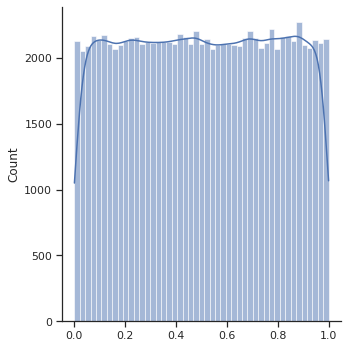

In [26]:
#Nomor 2 - Dibuat visualisasi agar terlihat berdistribusi apa.
plot = sns.displot(x=nyoba, kde=True)

Dari plot tersebut, terlihat bahwa bilangan random Greenberger berdistribusi uniform

#Nomor 3

Berdasarkan definisi, Metode Congruential akan berulang setelah maksimum suku ke m sehingga bersifat periodik. Ciri/Karakteristik dari metode ini adalah akan terjadi pengulangan hasil setelah sekian kali/hasil ke-n pembangkitan. 

Kelemahan periode:
Barisan bilangannya berulang dengan periode yang selalu < m. (periode sangat singkat)

Jika ingin memiliki periode yang lebih lama dalam pengulanganya, diperlukan memilih parameter yang baik untuk a dan m.

Jadi, ya X akan memiliki periode.


# Soal 02: Poisson Distribution

* Algoritma untuk menghasilkan bilangan random diskrit berdistribusi Poisson dapat anda temukan dari beberapa sumber di dunia maya: https://www.google.com/search?q=algorithm+generate+poisson+distribution&newwindow=1&sxsrf=ALiCzsbKw0SJtuLmaOS3B9XNVrTNtbeuXw:1665702878239&source=lnms&tbm=isch&sa=X&ved=2ahUKEwixjO_iqt76AhXpcGwGHavxB88Q_AUoAXoECAEQAw#imgrc=pnIy3d_qBdlPnM 

1. Aplikasikan algoritma tersebut dengan bahasa Python (tanpa menggunakan module : Pure Python).

2. Bandingkan hasil anda (melalui visualisasi) dengan distribusi Python yang dihasilkan oleh Numpy menggunakan 100.000 sample.
 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html


In [5]:
# Jawaban Soal 02 dapat dituliskan di cell ini. 
# Tambahkan cell lain jika diperlukan

def poisson (lmbd):
  l=np.exp(-lmbd)
  n=0
  u=np.random.uniform(0,1)

  pp=l
  f=1
  pow=1

  while u>pp:
    n=n+1
    f=n*f
    pow=lmbd*pow

    pp=pp+(pow/f)*l
  return n

def DiscRandPoisson(d,lmbd):
  lista=[]
  for i in range(d):
    lista.append(poisson(lmbd))
  lista=np.array(lista)
  return lista


[101  91  98 ...  98  88  87]


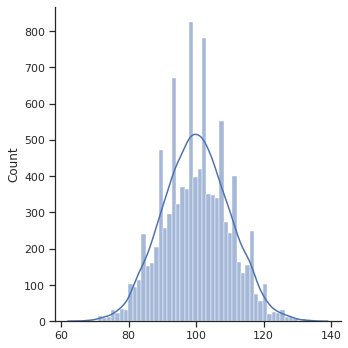

In [6]:
#Discrete Random Number Berdistribusi Poisson dengan Pure Python
a = DiscRandPoisson(10000,100)
print(a)
plota = sns.displot(x=a, kde=True)

[ 99 100 107 ... 101  78  90]


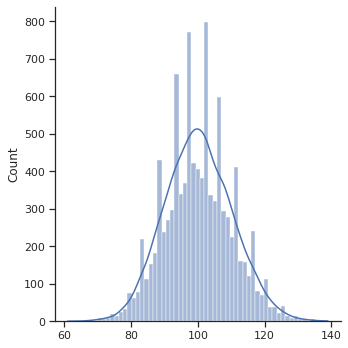

In [7]:
#Discrete Random Number Berdistribusi Poisson dengan Pure Python
b = np.random.poisson(lam=100,size=10000)
print(b)
plotb = sns.displot(x=b, kde=True)

Berdasarkan visualisasi tersebut, dapat dilihat bahwa Discrete Random Number Berdistribusi Poisson dengan pure python dan numpy cukup mirip

# Soal 03: CRUDE MONTE CARLO

* Di Module RNG minggu lalu sudah dibahas tentang Hit-or-Miss Monte Carlo untuk penyelesaian pendekatan dari sebuah integral. Namun Metode Crude Monte Carlo belum dibahas. Keterangan Metode Crude Monte Carlo adalah sebagai berikut:

<img alt="" src="https://github.com/taudataid/KompStat-CaseStudies/blob/main/images/crude-MC.png?raw=1"/>

* Atau anda juga bisa membaca lebih lanjut di tautan berikut: https://www.google.com/search?q=%22Crude+monte+carlo%22+integral&oq=%22Crude+monte+carlo%22+integral&aqs=edge..69i57.8774j0j1&sourceid=chrome&ie=UTF-8

* Menggunakan fungsi yang sama dengan yang ada di module kuliah $$\theta = \int_0^1 \frac{e^x-1}{e-1} dx$$
Tentukan:
1. Solusi Pendekatannya menggunakan Crude MC dengan N = 100
2. Bandingkan hasil pendekatan anda dengan solusi eksak dan solusi hit-or-miss
3. Buatlah selang kepercayaan 95% dari solusi MC ini.

In [8]:
# importing the modules
from scipy import random
import numpy as np
  
# limits of integration
a = 0
b = 1 # gets the value of pi
N = 100
  
# array of zeros of length N
ar = np.zeros(N)
  
# iterating over each Value of ar and filling 
# it with a random value between the limits a
# and b
for i in range (len(ar)):
    ar[i] = random.uniform(a,b)
  
# variable to store sum of the functions of 
# different values of x
integral = 0.0
  
# function to calculate the sin of a particular
# value of x
def f(x):
    return (np.exp(x)-1)/(np.exp(1)-1)
  
# iterates and sums up values of different functions
# of x
for i in ar:
    integral += f(i)
  
# we get the answer by the formula derived adobe
ans = (b-a)/float(N)*integral
  
# prints the solution
print ("The value calculated by monte carlo integration is {}.".format(ans))

The value calculated by monte carlo integration is 0.40789654467781555.


In [9]:
# Jawaban Soal 03 dapat dituliskan di cell ini. 
# Tambahkan cell lain jika diperlukan
from random import seed
from random import random
from numpy.random import seed
from numpy.random import rand

def f(x):
    return (np.exp(x)-1)/(np.exp(1)-1)

seed(1)

N=100
teta = 0.418
sigma = 0.286 #Solusi Eksak teta dan sigma
xrand = rand(N)
yrand = rand(N) # Random Uniform x dan y
print('$$$ Hit or Miss Monte Carlo $$$') # Hit or Miss Monte Carlo

fxrand=f(xrand)
CheckValue = fxrand>=yrand
Hit_or_Miss=sum(CheckValue)/N

print('Hasil Approksimasi = ', Hit_or_Miss)
print('Error = ', abs(teta-Hit_or_Miss))
print('Standar Error = ', np.sqrt(teta*(1-teta)/N))
print('Aproksimasi Error = ', np.sqrt(Hit_or_Miss*(1-Hit_or_Miss)/N))
print('Confidence Interval 95% = ', Hit_or_Miss, ' +/- ', 2*np.sqrt(Hit_or_Miss*(1-Hit_or_Miss)/N))

$$$ Hit or Miss Monte Carlo $$$
Hasil Approksimasi =  0.43
Error =  0.01200000000000001
Standar Error =  0.049323016939356014
Aproksimasi Error =  0.04950757517794625
Confidence Interval 95% =  0.43  +/-  0.0990151503558925


Sehingga dapat disimpulkan, yaitu
1. Solusi pendekatannya menggunakan Crude MC adalah 0.48810157967485096 sehingga masih masuk dalam interval 0.43  +/-  0.0990151503558925

2. Solusi eksak didapat dari hasil aproksimasi dikurangi dengan error, yaitu 0.43 - 0.01200000000000001 = 0.418
Maka, dapat disimpulkan

- Perbedaan hasil pendekatan dengan eksak, yaitu 0.48810157967485096- 0.418 = 0.0701015796749
- Perbedaan hasil pendekatan dengan hit or miss, yaitu 0.48810157967485096-0.43 = 0.0581015796749


3. Confidence Interval 95% adalah 0.43  +/-  0.0990151503558925

<center><h1><strong><font color="blue">Selamat Mengerjakan</font></strong></h1></center>

<img alt="" src="https://github.com/taudataid/KompStat-CaseStudies/blob/main/images/hard-work-happens-591479.jpg?raw=1"/>